# Introduction

This notebook contains the first steps of data processing regarding the exploration of the data. 

First the dataset is loaded. The next step describes which files the data set contains and how these files are structured.

Afterwards, the Yeo atlas is loaded which will be used for the brain parcellation.

# Load data

In this project a preprocessed resting-state data set is used which is provided by nilearn. It contains data of the ADHD-200 sample, an initiative aiming at investigating the neural basis of ADHD.

First, the open data set is loaded:

In [37]:
import nilearn
from nilearn import datasets
import pandas as pd

In [38]:
# Load the open data set ADHD 200 from nilearn
nilearn.datasets.fetch_adhd(n_subjects=40, data_dir='/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data', url=None, resume=True, verbose=1)

/home/nwiltberg/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/datasets/func.py:251: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


{'func': ['/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz',
  '/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/adhd/data/0027018/0027018_rest_tshift_RPI_vor

In [39]:
cd /mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05

/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05


The dataset contains a regressor file for each participant, with information about important signal confounds like motion parameters, compcor components etc. Let's have a closer look at this regressor file for one of the participants.

In [57]:
pd.read_table('data/adhd/data/0010042/0010042_regressors.csv').head()

,csf,constant,linearTrend,wm,global,motion-pitch,motion-roll,motion-yaw,motion-x,motion-y,motion-z,gm,compcor1,compcor2,compcor3,compcor4,compcor5
0,12140.708282,1.0,0.0,9322.722489,9955.469315,-0.0637,0.1032,-0.1516,-0.0376,-0.0112,0.0840,10617.938409,-0.035058,-0.006713,-0.071532,0.009847,-0.027601
1,12123.146913,1.0,1.0,9314.257684,9947.987176,-0.0708,0.0953,-0.1562,-0.0198,0.0021,0.0722,10611.036827,-0.026949,-0.091152,-0.030126,0.020055,-0.099798
2,12085.963127,1.0,2.0,9319.610045,9945.132852,-0.0795,0.0971,-0.1453,-0.0439,-0.0241,0.0972,10591.877177,0.002552,0.069165,0.090166,-0.016608,-0.071980
3,12109.299348,1.0,3.0,9299.841075,9943.648622,-0.0607,0.0918,-0.1601,-0.0418,-0.0133,0.0877,10592.008336,0.079391,0.029959,-0.098036,0.062493,0.024105
4,12072.330305,1.0,4.0,9297.870869,9925.640852,-0.0706,0.0873,-0.1482,-0.0313,-0.0118,0.0712,10570.445905,0.075471,-0.030123,0.084739,0.088217,0.012996


The Dataset also contains a file with phenotypic information like age, sex and diagnostic information. Let's take a closer look at this file as well.

In [58]:
data_file_pheno = glob('data/adhd/ADHD200_40subs_motion*.csv')
data_file_pheno

['data/adhd/ADHD200_40subs_motion_parameters_and_phenotypics.csv']

In [59]:
data_pheno = pd.read_csv(data_file_pheno[0])
data_pheno.head(n=10)

,Unnamed: 0,Subject,Rest.Scan,MeanFD,NumFD_greater_than_0.20,rootMeanSquareFD,FDquartile.top1.4thFD.,PercentFD_greater_than_0.20,MeanDVARS,MeanFD_Jenkinson,...,sess_1_rest_6_eyes,sess_1_anat_1,sess_1_which_anat,sess_2_rest_1,sess_2_rest_1_eyes,sess_2_rest_2,sess_2_rest_2_eyes,sess_2_anat_1,defacing_ok,defacing_notes
0,1,2014113,rest_1,0.0576,2,0.2400,0.0944,1.6000,16.1677,1.3868,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
1,2,3902469,rest_1,0.0580,0,0.2409,0.0931,0.0000,17.4188,1.2040,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4275075,rest_1,0.0789,0,0.2808,0.1520,0.0000,17.7796,1.8105,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,7774305,rest_1,0.0679,0,0.2606,0.1054,0.0000,16.7169,1.5137,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,yes,defaced part of front skull/brain
4,5,1019436,rest_1,0.0904,0,0.3006,0.1927,0.0000,19.6124,1.6769,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
5,6,3699991,rest_1,0.1113,15,0.3337,0.2524,9.8039,19.8704,2.6121,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,3154996,rest_1,0.0881,0,0.2968,0.1619,0.0000,18.6120,1.8118,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,3884955,rest_1,0.0988,8,0.3144,0.1881,6.4000,17.3609,1.9543,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,27034,rest_1,0.0484,1,0.2201,0.0860,0.3831,21.5895,0.9262,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,4134561,rest_1,0.0439,4,0.2095,0.0849,1.5267,25.0028,0.9207,...,NaN,pass,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN


Due to their quantity the table does not show all columns. But with the following code it is possible to get an overview about all collumns. 

In [60]:
# show all columns of the dataframe
data_pheno.columns

Index(['Unnamed: 0', 'Subject', 'Rest.Scan', 'MeanFD',
       'NumFD_greater_than_0.20', 'rootMeanSquareFD', 'FDquartile.top1.4thFD.',
       'PercentFD_greater_than_0.20', 'MeanDVARS', 'MeanFD_Jenkinson', 'site',
       'sibling_id', 'data_set', 'age', 'sex', 'handedness', 'full_2_iq',
       'full_4_iq', 'viq', 'piq', 'iq_measure', 'tdc', 'adhd',
       'adhd_inattentive', 'adhd_combined', 'adhd_subthreshold',
       'diagnosis_using_cdis', 'notes', 'sess_1_anat_2', 'oppositional',
       'cog_inatt', 'hyperac', 'anxious_shy', 'perfectionism',
       'social_problems', 'psychosomatic', 'conn_adhd', 'restless_impulsive',
       'emot_lability', 'conn_gi_tot', 'dsm_iv_inatt', 'dsm_iv_h_i',
       'dsm_iv_tot', 'study', 'sess_1_rest_1', 'sess_1_rest_1_eyes',
       'sess_1_rest_2', 'sess_1_rest_2_eyes', 'sess_1_rest_3',
       'sess_1_rest_3_eyes', 'sess_1_rest_4', 'sess_1_rest_4_eyes',
       'sess_1_rest_5', 'sess_1_rest_5_eyes', 'sess_1_rest_6',
       'sess_1_rest_6_eyes', 'sess_1_a

In the course of the data analysis, the data of the individual subjects is accessed using the subject ids. So it is necessary to create a list of all subject ids. 

In [61]:
# now I want to create list of all subject ids of the loaded data set
from numpy import loadtxt

sub_idx = list(loadtxt("data/adhd/ADHD200_40subs_ID.txt"))
print(sub_idx)

[2014113.0, 3902469.0, 4275075.0, 7774305.0, 1019436.0, 3699991.0, 3154996.0, 3884955.0, 27034.0, 4134561.0, 27018.0, 6115230.0, 27037.0, 8409791.0, 27011.0, 3007585.0, 8697774.0, 9750701.0, 10064.0, 21019.0, 10042.0, 10128.0, 2497695.0, 4164316.0, 1552181.0, 4046678.0, 23012.0, 1679142.0, 1206380.0, 23008.0, 4016887.0, 1418396.0, 2950754.0, 3994098.0, 3520880.0, 1517058.0, 9744150.0, 1562298.0, 3205761.0, 3624598.0]


In [46]:
sub_idx = [int(i) for i in sub_idx]
print(sub_idx)

[2014113, 3902469, 4275075, 7774305, 1019436, 3699991, 3154996, 3884955, 27034, 4134561, 27018, 6115230, 27037, 8409791, 27011, 3007585, 8697774, 9750701, 10064, 21019, 10042, 10128, 2497695, 4164316, 1552181, 4046678, 23012, 1679142, 1206380, 23008, 4016887, 1418396, 2950754, 3994098, 3520880, 1517058, 9744150, 1562298, 3205761, 3624598]


In [47]:
sub_idx = [str(i) for i in sub_idx]
print(sub_idx)

['2014113', '3902469', '4275075', '7774305', '1019436', '3699991', '3154996', '3884955', '27034', '4134561', '27018', '6115230', '27037', '8409791', '27011', '3007585', '8697774', '9750701', '10064', '21019', '10042', '10128', '2497695', '4164316', '1552181', '4046678', '23012', '1679142', '1206380', '23008', '4016887', '1418396', '2950754', '3994098', '3520880', '1517058', '9744150', '1562298', '3205761', '3624598']


In [49]:
# Path to resting state files
rest_files = ['/data/adhd/data/%s/%s_rest_tshift_RPI_voreg_mni.nii.gz' % (sub, sub) for sub in sub_idx]

In [50]:
# Path to counfound files
confound_files = ['/data/adhd/data/%s/%s_regressors.csv' % (sub, sub) for sub in sub_idx]

# Load atlas

The Yeo atlas (2011) contains a parcellation of the cerebral cortex into 7 networks like the frontoparietal network, the default mold network, the ventral attention network and the somatomotor network. Since these are regions of interest for this project, the atlas appears to be well suited.

In the next steps, the atlas is loaded and the loaded dictionary is explored.

In [51]:
# Path to Yeo atlas
atlas_yeo = datasets.fetch_atlas_yeo_2011(data_dir='/mnt/c/Users/nasta/Desktop/Forschungsmodul/project_msc05/data/yeo_atlas')

In [52]:
# Let's see what the dictionary of the atlas contains
atlas_yeo

{'description': "Yeo 2011 Atlas\n\n\nNotes\n-----\nThis atlas provides a labeling of some cortical voxels in the MNI152\nspace.\n\nFour versions of the atlas are available, according to the cortical\nmodel (thick or thin cortical surface) and to the number of regions\nconsidered (7 or 17).\n\nContent\n-------\n    :'anat': Background anatomical image for reference and visualization\n    :'thin_7': Cortical parcelation into 7 regions, thin cortical model\n    :'thin_17': Cortical parcelation into 17 regions, thin cortical model\n    :'thick_7': Cortical parcelation into 17 regions, thick cortical model\n    :'thick_17': Cortical parcelation into 17 regions, thick cortical model\n    :'colors_7': Text file for the coloring of 7-regions parcellation\n    :'colors_17': Text file for the coloring of 17-regions parcellation\n\n\nReferences\n----------\nFor more information on this dataset's structure, see\nhttp://surfer.nmr.mgh.harvard.edu/fswiki/CorticalParcellation_Yeo2011\n\nYeo BT, Krien

In [53]:
atlas_file = atlas_yeo.thick_7

In order to get a better picture of the brain parcellation, the yeo atlas is visualized in the next step.

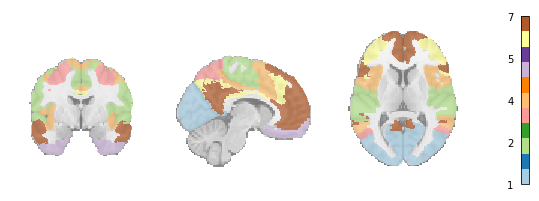

In [54]:
# Visualisation of parcellation atlas
from nilearn import plotting
plotting.plot_roi(atlas_file, draw_cross = False, annotate = False, cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

In [55]:
# Load labels for each atlas region
pd.read_csv(atlas_yeo.colors_7)

,0 NONE 0 0 0 0
0,1 7Networks_1 120 18 134 0
1,2 7Networks_2 70 130 180 0
2,3 7Networks_3 0 118 14 0
3,4 7Networks_4 196 58 250 0
4,5 7Networks_5 220 248 164 0
5,6 7Networks_6 230 148 34 0
6,7 7Networks_7 205 62 78 0
